In [103]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [104]:
# load data
data = pandas.read_csv("weather_forecast_data.csv")
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2475.000000,2460.000000,2468.000000,2467.000000,2473.000000
mean,22.573777,64.366909,9.911826,49.808770,1014.409327
std,7.332397,19.973824,5.780705,29.062298,20.182257
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.356603,47.183183,4.782528,24.261914,997.029601
50%,22.533110,64.090914,9.908572,49.692078,1013.583677
75%,28.984159,81.561021,14.953142,75.417253,1031.762839
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [105]:
data.isnull().sum()

Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64

In [110]:
# drop nulls of the data set
Drop_Nulls_data = data.copy()
Drop_Nulls_data.dropna(inplace=True)

In [111]:
# extract numeric features 
numericFeatures = data.select_dtypes(include="number")

In [112]:
# loop on all cols, to replace all nulls of it with the mean of the col
numericFeaturesWithMean = numericFeatures.copy()
for column in numericFeatures.columns:
    featureMean = numericFeaturesWithMean[column].mean()
    numericFeaturesWithMean[column].fillna(featureMean, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13984\3040548849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numericFeaturesWithMean[column].fillna(featureMean, inplace=True)


spliting data
<br>
feature scaling

In [115]:
# spliting training data and testing data
label_encoder = LabelEncoder()
targetFeature_WithMean = label_encoder.fit_transform(data['Rain'])
targetFeature_WithoutNulls = label_encoder.fit_transform(Drop_Nulls_data['Rain'])
Data_WithoutNulls_numericFeatrues = Drop_Nulls_data.select_dtypes(include="number") 

x_withMean_train, x_withMean_test, y_withMean_train, y_withMean_test = train_test_split(numericFeaturesWithMean, targetFeature_WithMean, test_size=0.2, random_state=42)
x_withoutNulls_train, x_withoutNulls_test, y_withoutNulls_train, y_withoutNulls_test = train_test_split(Data_WithoutNulls_numericFeatrues, targetFeature_WithoutNulls, test_size=0.2, random_state=42)

In [116]:
# scalling data 
scaler = StandardScaler()

# scaling traing data, test data that with mean
for column in x_withMean_train.columns:
     x_withMean_train[column] = scaler.fit_transform(x_withMean_train[[column]])
     x_withMean_test[column] = scaler.fit_transform(x_withMean_test[[column]])


# scaling traing data, test data that without nulls
for column in x_withoutNulls_train.columns:
   x_withoutNulls_train[column] = scaler.fit_transform(x_withoutNulls_train[[column]])
   x_withoutNulls_test[column] = scaler.fit_transform(x_withoutNulls_test[[column]])
   

In [117]:
#built in knn with mean replacment
knn_with_mean = KNeighborsClassifier(n_neighbors=3)
knn_with_mean.fit(x_withMean_train, y_withMean_train)
y_pred_with_mean = knn_with_mean.predict(x_withMean_test)


In [118]:
print(f"Accuracy: {accuracy_score(y_withMean_test, y_pred_with_mean):.2f}")
print(f"Precision: {precision_score(y_withMean_test, y_pred_with_mean):.2f}")
print(f"Recall: {recall_score(y_withMean_test, y_pred_with_mean):.2f}")


Accuracy: 0.97
Precision: 0.88
Recall: 0.82


In [119]:
# built in knn with dropping nulls 

knn_without_nulls = KNeighborsClassifier(n_neighbors=5)
knn_without_nulls.fit(x_withoutNulls_train, y_withoutNulls_train)
y_pred_without_nulls = knn_without_nulls.predict(x_withoutNulls_test)

In [120]:
print(f"Accuracy: {accuracy_score(y_withoutNulls_test, y_pred_without_nulls):.2f}")
print(f"Precision: {precision_score(y_withoutNulls_test, y_pred_without_nulls):.2f}")
print(f"Recall: {recall_score(y_withoutNulls_test, y_pred_without_nulls):.2f}")


Accuracy: 0.96
Precision: 0.87
Recall: 0.85


In [121]:
#knn from scratch
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        predictions = []
        for x_test in X_test.values: 
            distances = []
            for x_train in self.X_train.values:  
                distances.append(self.euclidean_distance(x_test, x_train))
            nearest_neighbors = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_neighbors]
            prediction = np.argmax(np.bincount(nearest_labels))
            predictions.append(prediction)
        return np.array(predictions)


In [122]:
knn = KNN(k=3)
knn.fit(x_withMean_train, y_withMean_train)
predictions = knn.predict(x_withMean_test)
euclidean_accuracy = accuracy_score(y_withMean_test, predictions)
precision = precision_score(y_withMean_test, predictions) 
recall = recall_score(y_withMean_test, predictions)     
print(f"Accuracy: {euclidean_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.97
Precision: 0.88
Recall: 0.82


Decision Tree

create train and test for data with mean

In [123]:
# decisionTree Classifier With Mean replacement
decisionTreeClassifierWithMean = tree.DecisionTreeClassifier()
decisionTreeClassifierWithMean.fit(x_withMean_train, y_withMean_train)
y_withMean_predicted = decisionTreeClassifierWithMean.predict(x_withMean_test)

In [124]:
print(f"Accuracy: {accuracy_score(y_withMean_test, y_withMean_predicted):.3f}")
print(f"precision: {precision_score(y_withMean_test, y_withMean_predicted):.3f}")
print(f"recall: {recall_score (y_withMean_test, y_withMean_predicted):.3f}")

Accuracy: 0.990
precision: 0.964
recall: 0.946


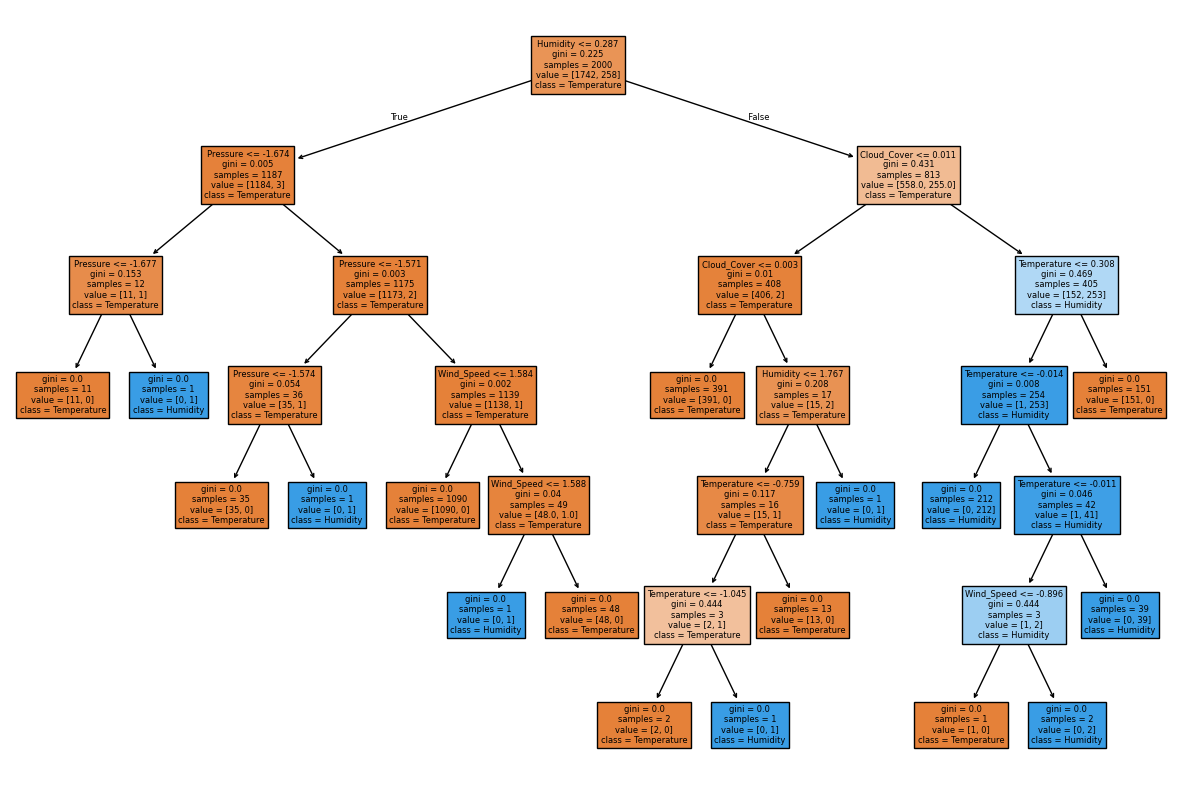

In [125]:
# visulize decision tree for sample with mean
plt.figure(figsize=(15, 10))
tree.plot_tree(decisionTreeClassifierWithMean, filled=True, feature_names=x_withMean_train.columns, class_names=["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"])
plt.show()

create train and test for data without nulls

In [126]:
decisionTreeClassifierWithNulls = tree.DecisionTreeClassifier()
decisionTreeClassifierWithNulls.fit(x_withoutNulls_train, y_withoutNulls_train)
y_withoutNulls_predicted = decisionTreeClassifierWithNulls.predict(x_withoutNulls_test)

In [128]:
print(f"Accuracy: {accuracy_score(y_withoutNulls_test, y_withoutNulls_predicted):.3f}")
print(f"Precision: {precision_score(y_withoutNulls_test, y_withoutNulls_predicted):.3f}")
print(f"Recall: {recall_score(y_withoutNulls_test,y_withoutNulls_predicted):.3f}")

Accuracy: 0.987
Precision: 0.943
Recall: 0.971


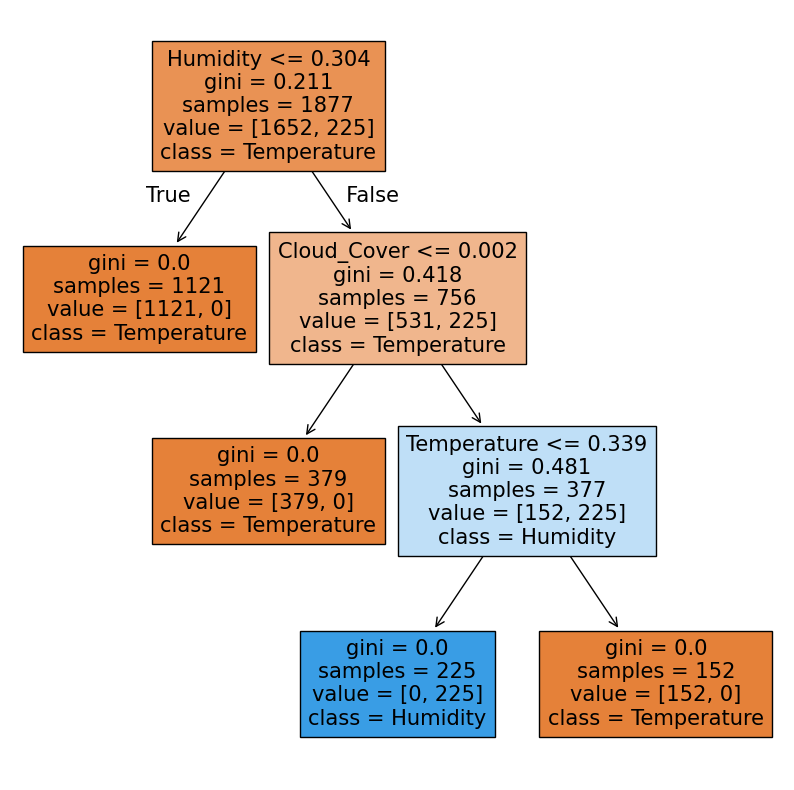

In [72]:
# visulize decision tree for sample with mean
plt.figure(figsize=(10, 10))
tree.plot_tree(decisionTreeClassifierWithNulls, filled=True, feature_names=x_withoutNulls_train.columns, class_names=["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"])
plt.show()

In [129]:
NBmodel=GaussianNB()
NBmodel.fit(x_withoutNulls_train, y_withoutNulls_train)


GaussianNB()

In [130]:
y_prediction_without_nulls = NBmodel.predict(x_withoutNulls_test)
print(f"Accuracy: {accuracy_score(y_withoutNulls_test, y_prediction_without_nulls):.3f}")
print(f"Precision: {precision_score(y_withoutNulls_test, y_prediction_without_nulls):.3f}")
print(f"Recall: {recall_score(y_withoutNulls_test, y_prediction_without_nulls):.3f}")


Accuracy: 0.960
Precision: 0.980
Recall: 0.735


In [131]:
# Naïve Bayes
NB_model_with_mean=GaussianNB()
NB_model_with_mean.fit(x_withMean_train,y_withMean_train)


GaussianNB()

In [132]:
# Evaluate the performance metrics for the dataset with mean-replaced missing values
y_prediction_with_mean=NB_model_with_mean.predict(x_withMean_test)
print(f"Accuracy: {accuracy_score(y_withMean_test, y_prediction_with_mean):.3f}")
print(f"Precision: {precision_score(y_withMean_test, y_prediction_with_mean):.3f}")
print(f"Recall: {recall_score(y_withMean_test, y_prediction_with_mean):.3f}")


Accuracy: 0.964
Precision: 1.000
Recall: 0.679
